# [Lab Session 3](fourier.ipynb)


In [55]:
import numpy as np
import matplotlib.pyplot as plt
#Importiert die Funktion "resize" aus dem Modul "skimage.transform"
from skimage.transform import resize

In [56]:
help(resize)

Help on function resize in module skimage.transform._warps:

resize(image, output_shape, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=None, anti_aliasing_sigma=None)
    Resize image to match a certain size.

    Performs interpolation to up-size or down-size N-dimensional images. Note
    that anti-aliasing should be enabled when down-sizing images to avoid
    aliasing artifacts. For downsampling with an integer factor also see
    `skimage.transform.downscale_local_mean`.

    Parameters
    ----------
    image : ndarray
        Input image.
    output_shape : iterable
        Size of the generated output image `(rows, cols[, ...][, dim])`. If
        `dim` is not provided, the number of channels is preserved. In case the
        number of input channels does not equal the number of output channels a
        n-dimensional interpolation is applied.

    Returns
    -------
    resized : ndarray
        Resized version of the input.

    Other pa

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


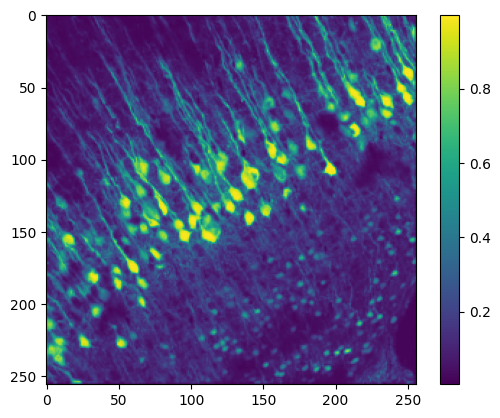

In [57]:
cell_imgo = plt.imread('data/cells.png')
cell_img = resize(cell_imgo, (256, 256))
plt.imshow(cell_img)
plt.colorbar()

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [58]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)
#Checking the real and the imaginary part of the result of the fourier transformation
#Das Bild ist ein 2D Bild, bedeutet wir nutzen "fft2"; und die Arrays der realen und imaginären Teiles sind ebenfalls 2D
print(cell_ft.real)
print("Dimension des realen Teils: ", cell_ft.real.ndim)
print(cell_ft.imag)
print("Dimension des imaginären Teils: ", cell_ft.imag.ndim)

complex128
[[ 1.34953203e+04 -6.37424462e+02  1.22295427e+02 ... -1.43730595e+02
   1.22295427e+02 -6.37424462e+02]
 [-2.44871852e+03  3.03513248e+03  8.02128913e+02 ... -5.77572723e+02
  -4.86958593e+02 -8.44796516e+00]
 [ 5.13230081e+01 -7.95647028e+02  6.08846590e+02 ...  1.46131127e+02
  -2.48644208e+02 -6.91764690e+02]
 ...
 [-3.73820936e+02 -6.63657737e+01  2.31162964e+02 ...  3.95064078e+02
  -6.43746276e+02  4.38251147e+02]
 [ 5.13230081e+01 -6.91764690e+02 -2.48644208e+02 ...  2.63773928e+02
   6.08846590e+02 -7.95647028e+02]
 [-2.44871852e+03 -8.44796516e+00 -4.86958593e+02 ...  7.39335185e+02
   8.02128913e+02  3.03513248e+03]]
Dimension des realen Teils:  2
[[ 0.00000000e+00 -3.07641620e+02  4.07510107e+02 ... -4.82000542e+02
  -4.07510107e+02  3.07641620e+02]
 [-8.21154760e+02  1.44198390e+03  1.35665748e+02 ...  2.31571626e+02
  -1.59397933e+02 -8.34845909e+02]
 [-1.21604799e+02 -1.07553965e+03  6.09860471e+01 ... -4.00125145e+00
   4.11370701e+01 -1.11374949e+02]
 ...
 [

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [59]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

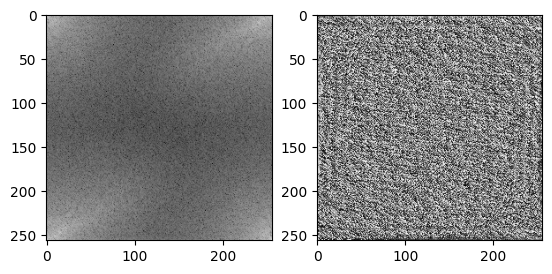

In [60]:
plt.figure()
#bezieht sich auf 1 Spalte, 2 Zeile, 1 Subplot
plt.subplot(1, 2, 1)
#Der Plot zeigt das log. Amplitudenbild in Graustufen
plt.imshow(np.log(amplitude), 'gray')
#bezieht sich auf 1 Spalte, 2 Zeile, 2 Subplot
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


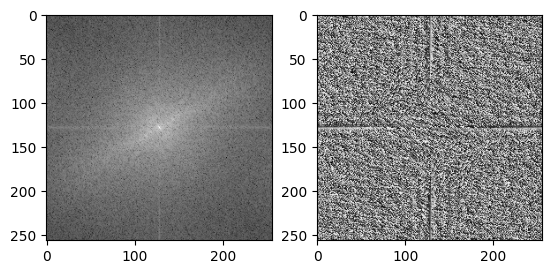

In [61]:
cell_ft0 = np.fft.fftshift(cell_ft)

amplitude0 = np.abs(cell_ft0)
phase0 = np.angle(cell_ft0)

plt.figure()
#bezieht sich auf 1 Spalte, 2 Zeile, 1 Subplot
plt.subplot(1, 2, 1)
#Der Plot zeigt das log. Amplitudenbild in Graustufen
plt.imshow(np.log(amplitude0), 'gray')
#bezieht sich auf 1 Spalte, 2 Zeile, 2 Subplot
plt.subplot(1, 2, 2)
plt.imshow(phase0, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


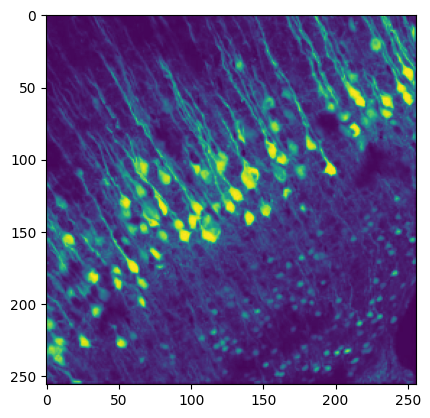

In [62]:
cell_ft_re = np.fft.ifft2(cell_ft)
#Zeigt nur die realen Werte des invers fourier transformierten Bildes an
plt.imshow(cell_ft_re.real)


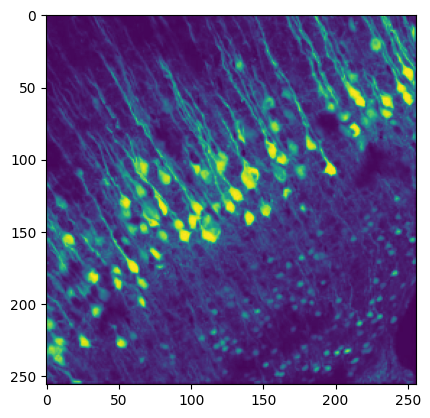

In [63]:
#es ist auch mgl die inverse F. Transformation auf den geshifteten Array anzuwenden
cell_ft0_res = np.fft.ifftshift(cell_ft0)
cell_ft0_re = np.fft.ifft2(cell_ft0_res)
#Zeigt nur die realen Werte des invers fourier transformierten Bildes an
plt.imshow(cell_ft0_re.real)


---


**[Task 2 (a).]()** Load the brain CT image.


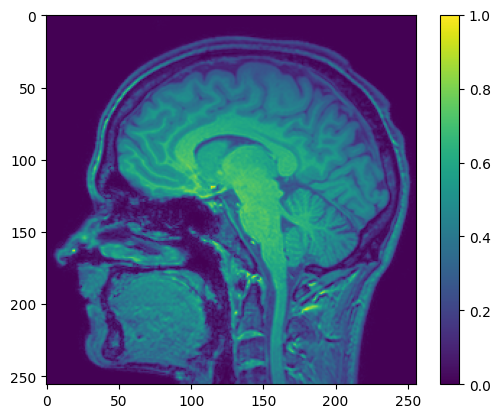

In [64]:
brain_img = plt.imread('data/brain_ct.png')
plt.imshow(brain_img)
plt.colorbar()

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [65]:
#Fourier-Transformation
brain_ft = np.fft.fft2(brain_img)
#Shift
brain_ft0 = np.fft.fftshift(brain_ft)
#Die Amplitude und Phase des geshifteten Arrays
#kein 0 im Namen weil keine vorhanden die nicht vom Shift ausgehen
amplitude_b = np.abs(brain_ft0)
phase_b = np.angle(brain_ft0)
#print("Die Amplitude ist: ", amplitude_b)
#print("DIe Phase ist: ", phase_b)

In [66]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


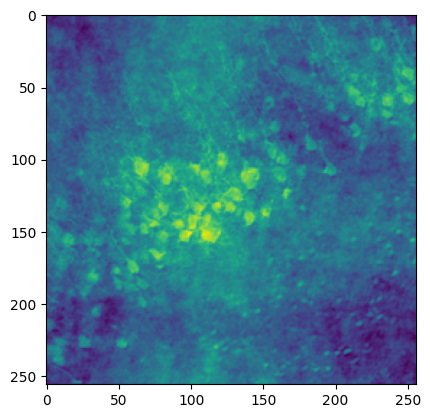

In [67]:
#Ich werden mit den beiden geshifteten Values arbeiten
#Converting the values
mer1 = to_complex_array(amplitude_b, phase0)
#Reverse shift
mer1s = np.fft.ifftshift(mer1)
#Inverse Transformation
mer1sr = np.fft.ifft2(mer1s)
plt.imshow(mer1sr.real)

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


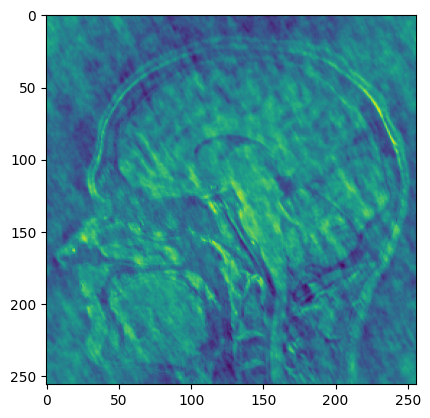

In [68]:
#Ich werden mit den beiden geshifteten Values arbeiten
#Converting the values
mer2 = to_complex_array(amplitude0, phase_b)
#Reverse shift
mer2s = np.fft.ifftshift(mer2)
#Inverse Transformation
mer2sr = np.fft.ifft2(mer2s)
plt.imshow(mer2sr.real)

(e) Conclude, what carries more information, the phase or the amplitude?
    Es scheint das die Phase informationsreicher ist 
        Wenn wir mit der Phase des Zellbilds arbeiten, erkennt man die Zellen deutlicher auf dem Bild
        Wenn wir mit der Phase des Hirn-CTs arbeiten, erkennt man dieses noch deutlicher


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [69]:
filter_window_size = 50

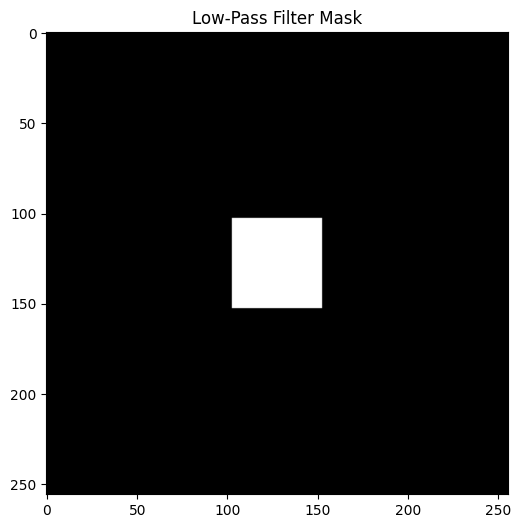

In [70]:
lowpass = np.zeros_like(cell_img)
# Calculate the center of the image
#// wird statt / genommen, damit ganzzahlige Werte ausgegeben werden (int statt float)
center_x, center_y = cell_img.shape[0] // 2, cell_img.shape[1] // 2

# Insert the rectangle of ones at the center
x_start = center_x - filter_window_size // 2
x_end = center_x + filter_window_size // 2
y_start = center_y - filter_window_size // 2
y_end = center_y + filter_window_size // 2

lowpass[x_start:x_end, y_start:y_end] = 1

# Visualize the mask
plt.figure(figsize=(6, 6))
plt.title("Low-Pass Filter Mask")
plt.imshow(lowpass, cmap="gray")
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


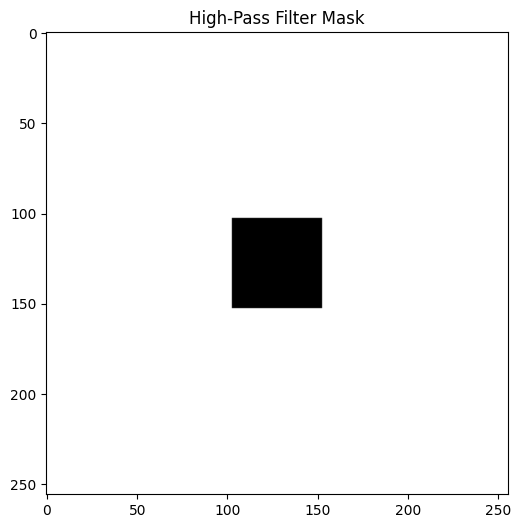

In [71]:
highpass = 1- lowpass
plt.figure(figsize=(6, 6))
plt.title("High-Pass Filter Mask")
plt.imshow(highpass, cmap="gray")
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_674/3167241422.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amp_b_low), 'gray')
/tmp/ipykernel_674/3167241422.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amp_b_high), 'gray')


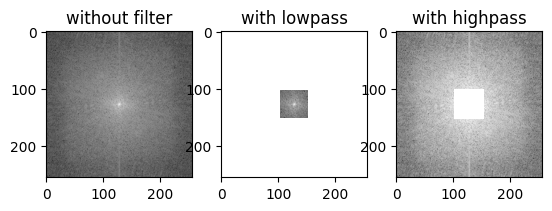

In [78]:
#Multiplizieren der shifted Amplituden mit masken
amp_b_low = amplitude_b * lowpass
amp_b_high = amplitude_b * highpass

#Darstellen der drei Amplituden
plt.figure()
plt.subplot(1, 3, 1)
plt.title("without filter")
plt.imshow(np.log(amplitude_b), 'gray')

plt.subplot(1, 3, 2)
plt.title("with lowpass")
plt.imshow(np.log(amp_b_low), 'gray')

plt.subplot(1, 3, 3)
plt.title("with highpass")
plt.imshow(np.log(amp_b_high), 'gray')

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


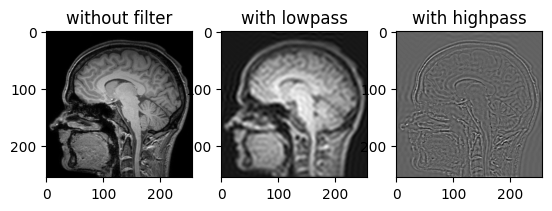

In [83]:
#Die Masken wurden bereits auf die Amplituden angewand
#erzeugen der komplexen Arrays
brain_mer = to_complex_array(amplitude_b, phase_b)
brain_low_mer = to_complex_array(amp_b_low, phase_b)
brain_high_mer = to_complex_array(amp_b_high, phase_b)

#reverse shift
brain_mer_s = np.fft.ifftshift(brain_mer)
brain_low_mer_s = np.fft.ifftshift(brain_low_mer)
brain_high_mer_s = np.fft.ifftshift(brain_high_mer)

#inverse transformation
brain_mer_st = np.fft.ifft2(brain_mer_s)
brain_low_mer_st = np.fft.ifft2(brain_low_mer_s)
brain_high_mer_sr = np.fft.ifft2(brain_high_mer_s) 

#present result
plt.figure()
plt.subplot(1, 3, 1)
plt.title("without filter")
plt.imshow(brain_mer_st.real, 'gray')

plt.subplot(1, 3, 2)
plt.title("with lowpass")
plt.imshow(brain_low_mer_st.real, 'gray')

plt.subplot(1, 3, 3)
plt.title("with highpass")
plt.imshow(brain_high_mer_sr.real, 'gray')


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


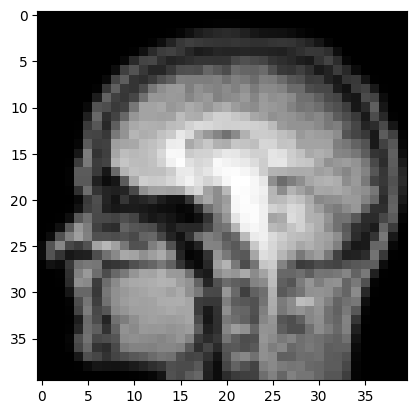

In [73]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
